<div style="border-top: 5px solid #E8751A; border-bottom: 5px dashed #FDA403; border-left: 5px double #F6F193; border-right: 5px dotted #E8751A; color: #19a01a; border-radius: 10px; margin: 10px; padding: 20px; width: 95%;">

<div style='background-color: #EADFB4; border: 2px solid '>
<font size="+2" color="#87A922" ><b>🔴Import Libraries 📦</b></font>
</div>
</div>

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams["figure.figsize"] = (20,10)

<div style="border-top: 5px solid #E8751A; border-bottom: 5px dashed #FDA403; border-left: 5px double #F6F193; border-right: 5px dotted #E8751A; color: #19a01a; border-radius: 10px; margin: 10px; padding: 20px; width: 95%;">

<div style='background-color: #EADFB4; border: 2px solid '>
    <font size="+2" color="#87A922" ><b>📄 Load Dataset 📰</b></font>
</div>
</div>

In [144]:
df1 = pd.read_csv('/kaggle/input/bangalore-house-price-prediction/Bengaluru_House_Data.csv')

In [145]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


<div style="border-top: 5px solid #E8751A; border-bottom: 5px dashed #FDA403; border-left: 5px double #F6F193; border-right: 5px dotted #E8751A; color: #19a01a; border-radius: 10px; margin: 10px; padding: 20px; width: 95%;">

<div style='background-color: #EADFB4; border: 2px solid '>
    <font size="+2" color="#87A922" ><b> Understanding the dataset 🕵️‍♀️</b></font>
</div>
</div>

In [146]:
df1.shape

(13320, 9)

In [147]:
df2 = df1.groupby('area_type')['area_type'].agg('count')

In [148]:
df2.head()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [149]:
df2 = df1.drop (['area_type', 'society','balcony','availability'], axis = 'columns')

In [150]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


<div style="border-top: 5px solid #E8751A; border-bottom: 5px dashed #FDA403; border-left: 5px double #F6F193; border-right: 5px dotted #E8751A; color: #19a01a; border-radius: 10px; margin: 10px; padding: 20px; width: 95%;">

<div style='background-color: #EADFB4; border: 2px solid '>
    <font size="+2" color="#87A922" ><b> Data Cleaning 🧪</b></font>
</div>
</div>

In [151]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [152]:
df3 = df2.dropna()
df3.isnull().sum()


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [153]:
df3.shape

(13246, 5)

In [154]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [155]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [156]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [157]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [158]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [159]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [160]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [161]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [162]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [163]:
convert_sqft_to_num('2000 - 2850 ')

2425.0

In [164]:
convert_sqft_to_num('4125Perch')

In [165]:
df4  = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [166]:
#checking by indexes
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

# <p style="font-family: 'Inter', sans-serif; font-weight: 700; letter-spacing: 1px; color: Orange; font-size: 2rem; text-align: left; padding-bottom: 10px; border-bottom: 5px double #F6F193;"><span style="color: #0070f3;">3</span> | Feature Engineering and Dimensional Reduction ⛩️</p>


<!-- 
<div style=" width: 80%; margin: 20px auto; background:#31363F; border-radius: 10px; padding: 20px; display: flex; align-items: center; justify-content: center; gap: 20px;"> <div> -->



In [167]:
df5= df4.copy()

In [168]:
df5.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [169]:
df5['price_per_sqft']  = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [170]:
len(df5['location'].unique())

1304

##### the unique number of location is too high and its dimentional curse or problem

there may be some unique locations that have two or one data points

In [171]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

those columns having less than 10 data points lets call them other location

In [172]:
len(location_stats[location_stats<=10])


1052

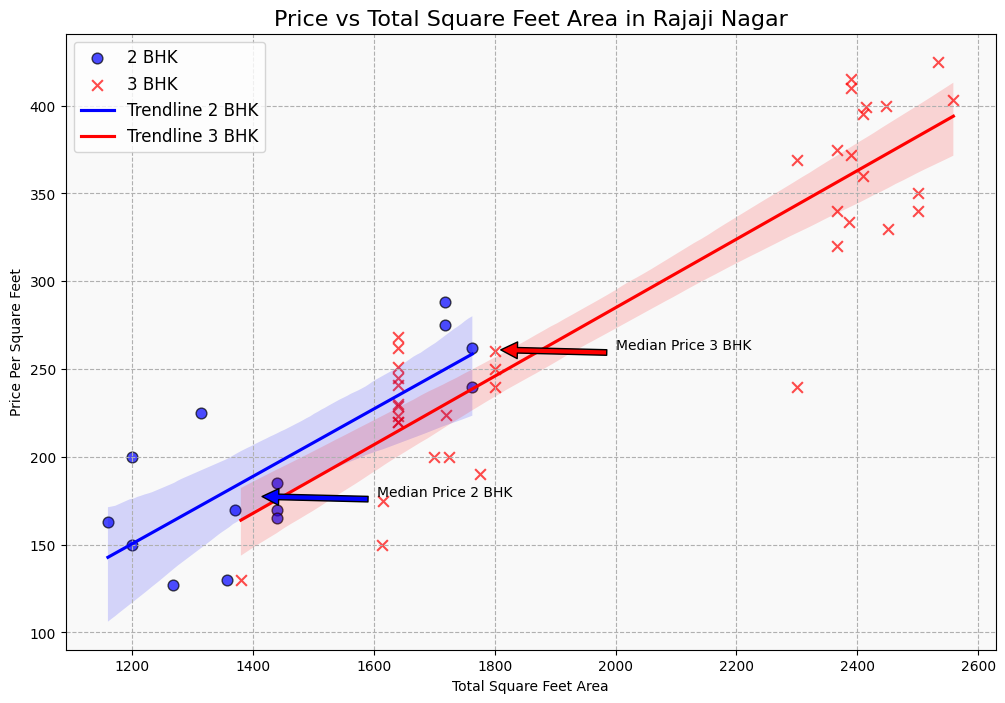

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk == 2)]
    bhk3 = df[(df.location==location) & (df.bhk == 3)]
    
    plt.figure(figsize=(12, 8))  # Adjust figure size
    
    # Scatter plot for 2 BHK
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=60, alpha=0.7, edgecolors='k')
    
    # Scatter plot for 3 BHK with different marker style
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='x', color='red', label='3 BHK', s=60, alpha=0.7, edgecolors='k')
    
    # Add trend lines
    sns.regplot(x=bhk2.total_sqft, y=bhk2.price, scatter=False, color='blue', label='Trendline 2 BHK')
    sns.regplot(x=bhk3.total_sqft, y=bhk3.price, scatter=False, color='red', label='Trendline 3 BHK')
    
    # Annotate median prices
    plt.annotate('Median Price 2 BHK', xy=(bhk2.total_sqft.median(), bhk2.price.median()), xytext=(bhk2.total_sqft.median()+200, bhk2.price.median()),
                 arrowprops=dict(facecolor='blue', shrink=0.05))
    plt.annotate('Median Price 3 BHK', xy=(bhk3.total_sqft.median(), bhk3.price.median()), xytext=(bhk3.total_sqft.median()+200, bhk3.price.median()),
                 arrowprops=dict(facecolor='red', shrink=0.05))
    
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title('Price vs Total Square Feet Area in {}'.format(location), fontsize=16)  # Custom title font size
    plt.legend(fontsize=12)  # Custom legend font size
    plt.grid(True, linestyle='--')  # Add gridlines with dashed style
    plt.gca().set_facecolor('#f9f9f9')  # Change background color
    
    plt.show()

# Example usage
plot_scatter_chart(df7, 'Rajaji Nagar')


<div style="border-top: 5px solid #E8751A; border-bottom: 5px dashed #FDA403; border-left: 5px double #F6F193; border-right: 5px dotted #E8751A; color: #19a01a; border-radius: 10px; margin: 10px; padding: 20px; width: 95%;">

<div style='background-color: #EADFB4; border: 2px solid '>
    <font size="+2" color="#87A922" ><b> For Hebbal Location 🌐</b></font>
</div>
    
</div>

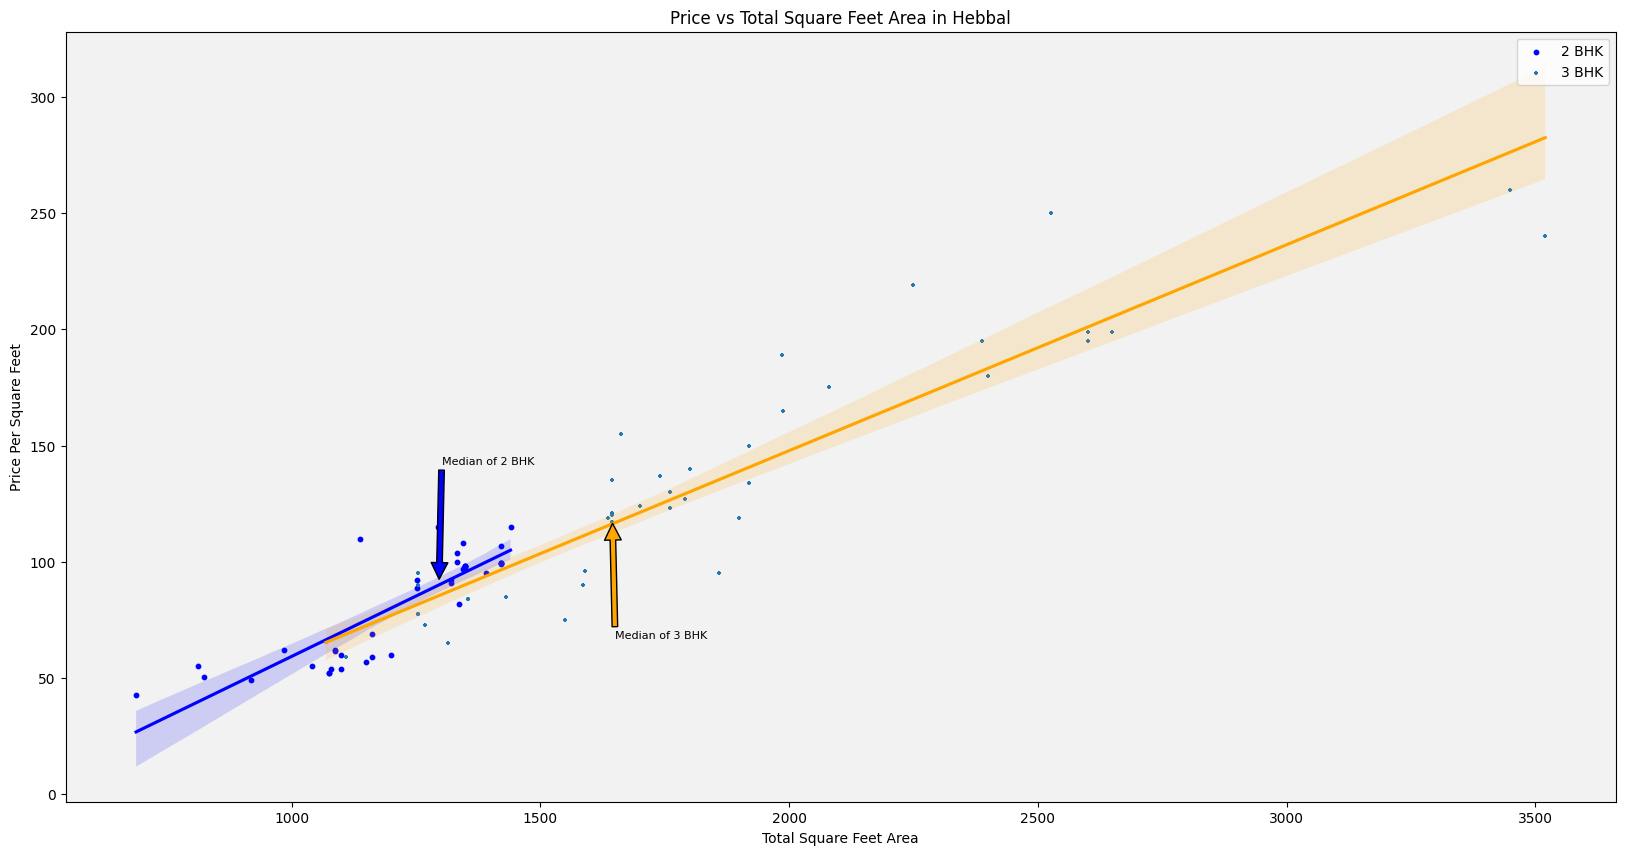

<Figure size 1500x1000 with 0 Axes>

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_scatter_chart(df, location, sample_size=1000):
    bhk2 = df[(df.location==location) & (df.bhk == 2)]
    bhk3 = df[(df.location==location) & (df.bhk == 3)]
    
    # Filter out extreme outliers
    bhk2_filtered = bhk2[bhk2.price <= np.percentile(bhk2.price, 99)]  # Filter out top 1% of prices
    bhk3_filtered = bhk3[bhk3.price <= np.percentile(bhk3.price, 99)]  # Filter out top 1% of prices
    
    # Sample data to reduce the number of data points
    bhk2_sample = bhk2_filtered.sample(n=min(sample_size, len(bhk2_filtered)))  # Added random_state for reproducibility
    bhk3_sample = bhk3_filtered.sample(n=min(sample_size, len(bhk3_filtered)))  # Added random_state for reproducibility
    
    # Set background color
    plt.figure(figsize=(20, 10))  # Reduced figure size
    
    # Scatter plots for 2 BHK and 3 BHK with reduced marker size
    plt.scatter(bhk2_sample.total_sqft, bhk2_sample.price, color='blue', label='2 BHK', s=10)  # Reduced marker size
    plt.scatter(bhk3_sample.total_sqft, bhk3_sample.price, marker='+', label='3 BHK', s=10)  # Reduced marker size
    
    # Trend lines
    sns.regplot(x=bhk2_sample.total_sqft, y=bhk2_sample.price, scatter=False, color='blue')

    sns.regplot(x=bhk3_sample.total_sqft, y=bhk3_sample.price, scatter=False, color='orange')
    
    # Annotations for median prices with reduced font size
    plt.annotate('Median of 2 BHK', xy=(np.median(bhk2_sample.total_sqft), np.median(bhk2_sample.price)), xytext=(np.median(bhk2_sample.total_sqft)+5, np.median(bhk2_sample.price)+50),
                 arrowprops=dict(facecolor='blue', shrink=0.01), fontsize=8)  # Reduced font size
    plt.annotate('Median of 3 BHK', xy=(np.median(bhk3_sample.total_sqft), np.median(bhk3_sample.price)), xytext=(np.median(bhk3_sample.total_sqft)+5, np.median(bhk3_sample.price)-50),
                 arrowprops=dict(facecolor='orange', shrink=0.01), fontsize=8)  # Reduced font size
    
    # plt.xlim(500,1500) 
    # plt.ylim(2,10)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title('Price vs Total Square Feet Area in {}'.format(location))
    plt.legend()
    plt.grid(False)
    plt.gca().set_facecolor('#f2f2f2')  # Set background color
    # plt.yscale('log')
    plt.show()
    plt.savefig('plot1.png')
    
    
    
    
# Example usage with reduced sample size
plot_scatter_chart(df7, 'Hebbal', sample_size=1000)


By looking into the plots it can be easily determind that for some square feet area the price for 2 bedrooms apartment is higher than 3 bedroom apartment and guess what these are the outliers and we have to remove them.


We should also remove properties where for same location, the price of (for example) 3 bedrooms apartment is lessthan 2 bedrooms apartment (with same square ft area). what we will do is for a given location, we will build a dictionary of stats per bhk i.e.

```python
{
    '1' : {
        'mean': 4000,
        'std' : 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std' : 2300,
        'count': 22
    },
}
```

<b>Now we can remove those 2 BHK apartment whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment</b>

In [186]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats ['bhk'] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices= np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['means'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

df8 = remove_bhk_outliers(df7)
df8.shape

(10241, 7)

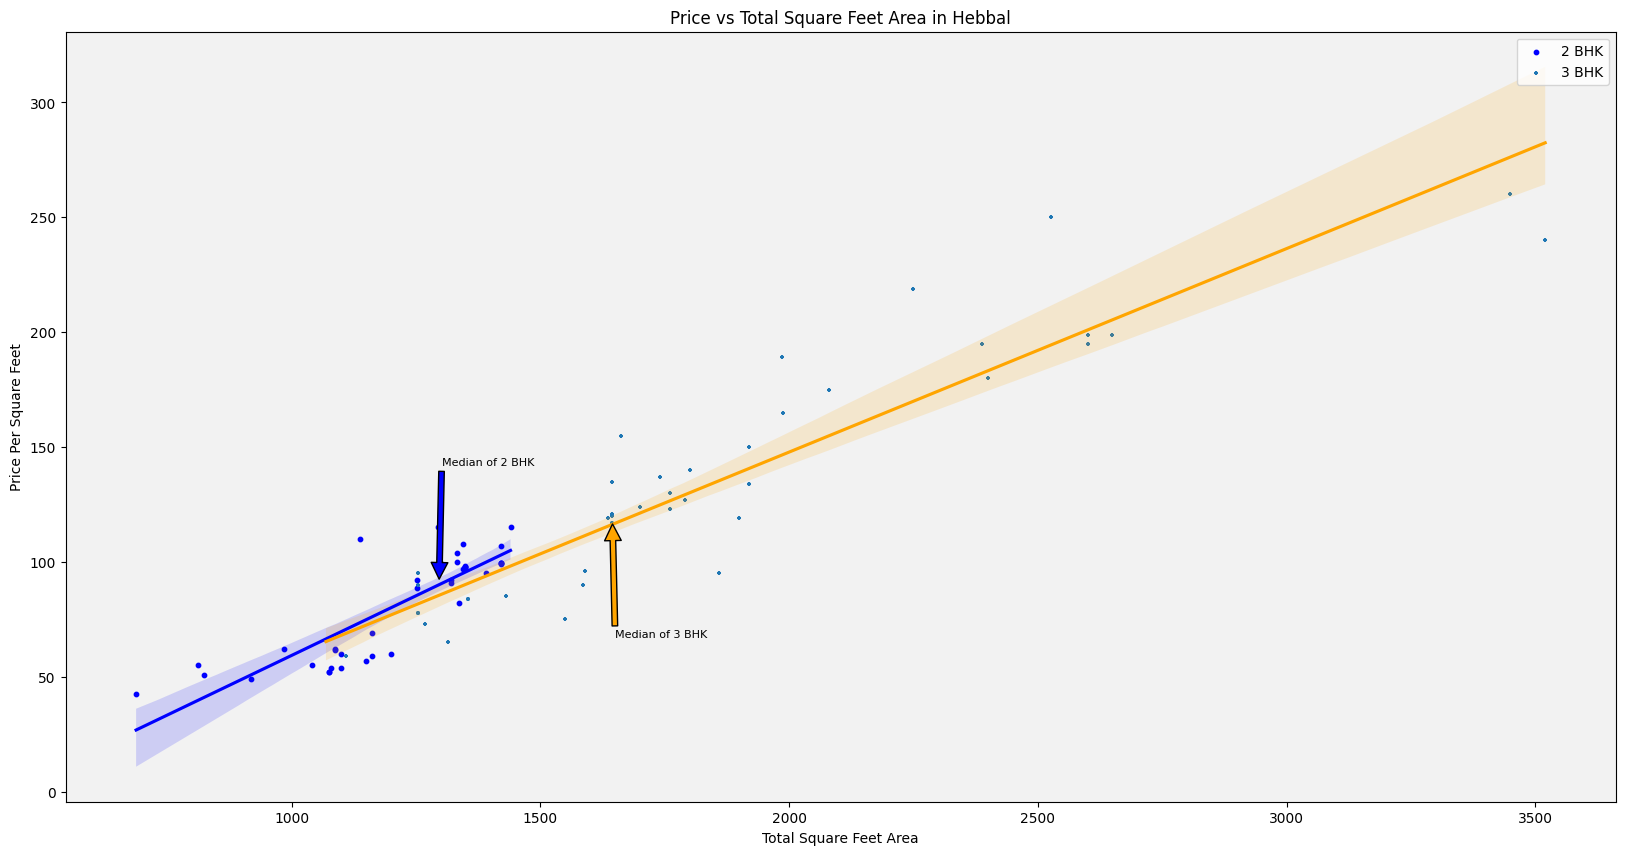

<Figure size 1500x1000 with 0 Axes>

In [187]:
plot_scatter_chart(df8, 'Hebbal')